# GPL supplementary files

In [1]:
import pandas as pd
import os
import re

In [2]:
path = "/export/space2/users/diegocar/Test/Query/2312/07_getGeoTest/getGeoTest.tsv"
data = pd.read_csv(path, sep='\t')
download = pd.read_csv("../../abasySpecieFiles/downloadPaths.tsv", sep='\t')
newData = pd.merge(download[["GSM_geo_accession", "Local_path", "File_name", "is_processable"]],
                    data[["GSM_geo_accession", "GPL_manufacturer", "GPL_supplementary_file", "GPL_geo_accession"]],
                      on="GSM_geo_accession").drop_duplicates()
newData

,GSM_geo_accession,Local_path,File_name,is_processable,GPL_manufacturer,GPL_supplementary_file,GPL_geo_accession
0,GSM4505453,/export/storage/users/diegocar/abasySpecieFile...,GSM4505453_168_lysis.phase_1_FEoutput.txt,True,Agilent,NaN,GPL21669
1,GSM4505454,/export/storage/users/diegocar/abasySpecieFile...,GSM4505454_168_lysis.phase_2_FEoutput.txt,True,Agilent,NaN,GPL21669
2,GSM4505455,/export/storage/users/diegocar/abasySpecieFile...,GSM4505455_168_lysis.phase_3_FEoutput.txt,True,Agilent,NaN,GPL21669
3,GSM4505456,/export/storage/users/diegocar/abasySpecieFile...,GSM4505456_tat_lysis.phase_1_FEoutput.txt,True,Agilent,NaN,GPL21669
4,GSM4505457,/export/storage/users/diegocar/abasySpecieFile...,GSM4505457_tat_lysis.phase_2_FEoutput.txt,True,Agilent,NaN,GPL21669
...,...,...,...,...,...,...,...
8016,GSM33612,/export/storage/users/diegocar/abasySpecieFile...,GSM33612-Cy5.jpg,False,NaN,NaN,GPL1482
8017,GSM33612,/export/storage/users/diegocar/abasySpecieFile...,GSM33612-Ratio.jpg,False,NaN,NaN,GPL1482
8018,GSM33613,/export/storage/users/diegocar/abasySpecieFile...,GSM33613-Cy3.jpg,False,NaN,NaN,GPL1482
8019,GSM33613,/export/storage/users/diegocar/abasySpecieFile...,GSM33613-Cy5.jpg,False,NaN,NaN,GPL1482


Any_GPL_supp    44
No_GPL_supp     33
Name: count, dtype: int64
Any_GPL_supp    57.0
No_GPL_supp     43.0
Name: count, dtype: float64


<Axes: >

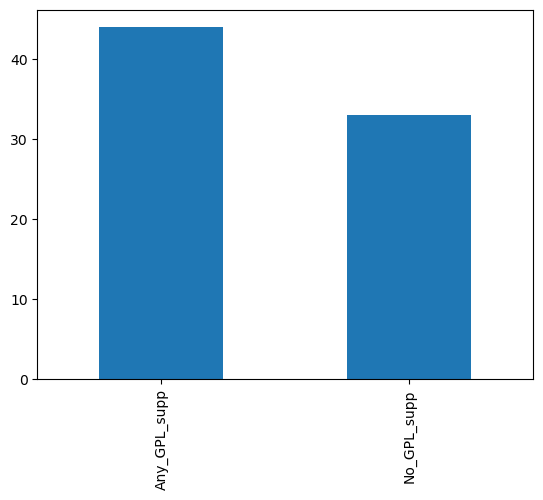

In [122]:
# GPL supplementary availability by GPL  Procesables
newData["has_GPL_supp"] = newData.GPL_supplementary_file.apply(lambda x: type(x) != float)
temp = newData[newData.is_processable][["has_GPL_supp", "GPL_geo_accession"]].drop_duplicates()
temp = temp.has_GPL_supp.value_counts()
temp.index = ["Any_GPL_supp", "No_GPL_supp"]
print(temp)
print(round(temp* 100 / sum(temp)))
temp.plot(kind="bar")

Any_GPL_supp    63.0
No_GPL_supp     37.0
Name: count, dtype: float64


<Axes: >

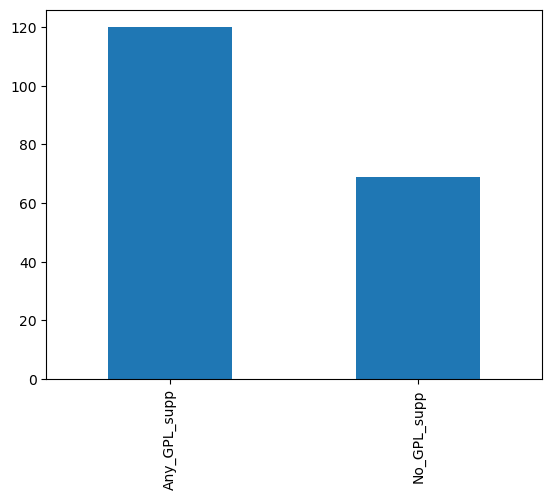

In [105]:
# GPL supplementary availability by GPL  Todos
newData["has_GPL_supp"] = newData.GPL_supplementary_file.apply(lambda x: type(x) != float)
temp = newData[["has_GPL_supp", "GPL_geo_accession"]].drop_duplicates()
temp = temp.has_GPL_supp.value_counts()
temp.index = ["Any_GPL_supp", "No_GPL_supp"]
print(round(temp* 100 / sum(temp)))
temp.plot(kind="bar")

Any_GPL_supp    55.0
No_GPL_supp     45.0
Name: count, dtype: float64


<Axes: >

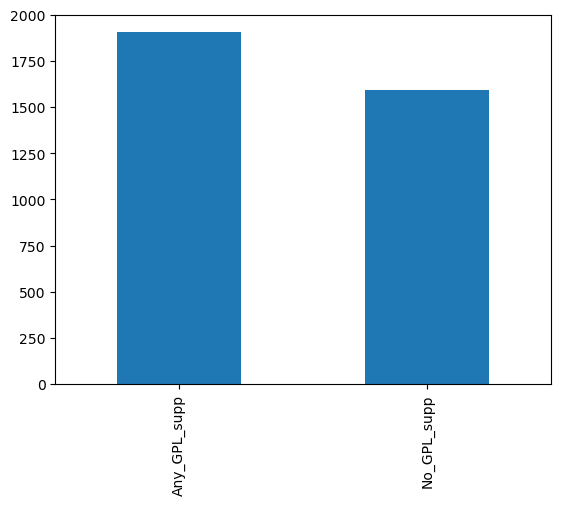

In [88]:
# GPL supplementary availability by GSM
newData["has_GPL_supp"] = newData.GPL_supplementary_file.apply(lambda x: type(x) != float)
temp = newData[newData.is_processable][["has_GPL_supp", "GSM_geo_accession"]].drop_duplicates()
temp = temp.has_GPL_supp.value_counts()
temp.index = ["Any_GPL_supp", "No_GPL_supp"]
print(round(temp* 100 / sum(temp)))
temp.plot(kind="bar")

GPL_manufacturer  has_GPL_supp
Agilent           False           26
NimbleGen         True            23
Affymetrix        True            12
Agilent           True             9
Affymetrix        False            6
NimbleGen         False            1
Name: count, dtype: int64
GPL_manufacturer  has_GPL_supp
Agilent           False           33.77
NimbleGen         True            29.87
Affymetrix        True            15.58
Agilent           True            11.69
Affymetrix        False            7.79
NimbleGen         False            1.30
Name: count, dtype: float64


<Axes: xlabel='GPL_manufacturer,has_GPL_supp'>

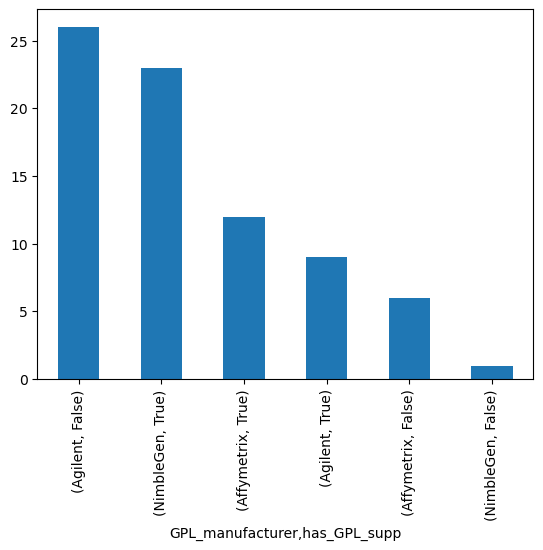

In [90]:
# GPL availability by manufacturer
temp = newData[newData.is_processable][["GPL_manufacturer", "has_GPL_supp", "GPL_geo_accession"]].drop_duplicates()
temp = temp[["GPL_manufacturer", "has_GPL_supp"]].value_counts()
print(temp)
print(round(temp * 100 / sum(temp), 2))
temp.plot(kind="bar")

No_CDF     10
Has_CDF     8
Name: count, dtype: int64
No_CDF     56.0
Has_CDF    44.0
Name: count, dtype: float64


<Axes: >

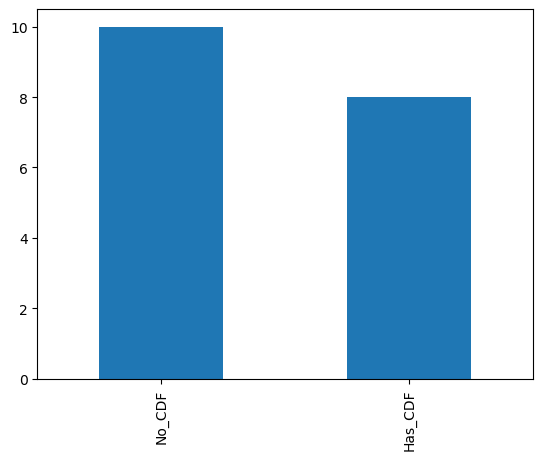

In [91]:
# Affymetrix .CDF availability by GPL
temp = newData[(newData.GPL_manufacturer == "Affymetrix") & newData.is_processable][["GPL_supplementary_file", "GPL_geo_accession"]].drop_duplicates()
temp = temp.GPL_supplementary_file.apply(lambda x: False if type(x) == float else bool(re.search(r".cdf", x, flags=re.IGNORECASE))).value_counts()
temp.index = ["No_CDF", "Has_CDF"]
print(temp)
print(round(temp*100/sum(temp)))
temp.plot(kind="bar")

No_CDF     834
Has_CDF    322
Name: count, dtype: int64
No_CDF     72.0
Has_CDF    28.0
Name: count, dtype: float64


<Axes: >

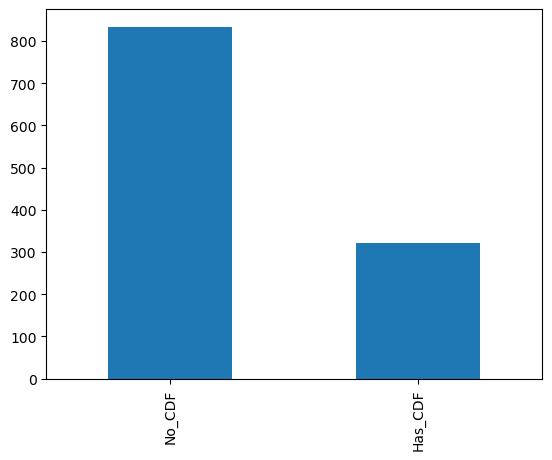

In [92]:
# Affymetrix .CDF availability by GSM
temp = newData[(newData.GPL_manufacturer == "Affymetrix") & newData.is_processable][["GPL_supplementary_file", "GSM_geo_accession"]].drop_duplicates()
temp = temp.GPL_supplementary_file.apply(lambda x: False if type(x) == float else bool(re.search(r".cdf", x, flags=re.IGNORECASE))).value_counts()
temp.index = ["No_CDF", "Has_CDF"]
print(temp)
print(round(temp*100/sum(temp)))
temp.plot(kind="bar")

Has_NDF    1436
No_NDF       12
Name: count, dtype: int64
Has_NDF    99.0
No_NDF      1.0
Name: count, dtype: float64


<Axes: >

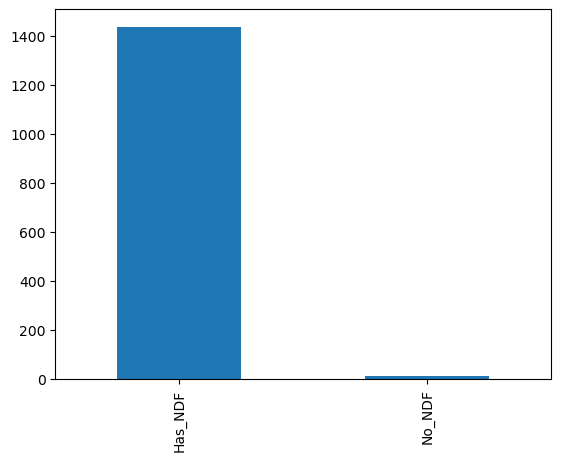

In [94]:
# NimbleGen .NDF availability by GSM
temp = newData[(newData.GPL_manufacturer == "NimbleGen") & newData.is_processable][["GPL_supplementary_file", "GSM_geo_accession"]].drop_duplicates()
temp = temp.GPL_supplementary_file.apply(lambda x: False if type(x) == float else bool(re.search(r".ndf", x, flags=re.IGNORECASE))).value_counts()
temp.index = ["Has_NDF", "No_NDF"]
print(temp)
print(round(temp*100/sum(temp)))
temp.plot(kind="bar")

Has_NDF    23
No_NDF      1
Name: count, dtype: int64
Has_NDF    96.0
No_NDF      4.0
Name: count, dtype: float64


<Axes: >

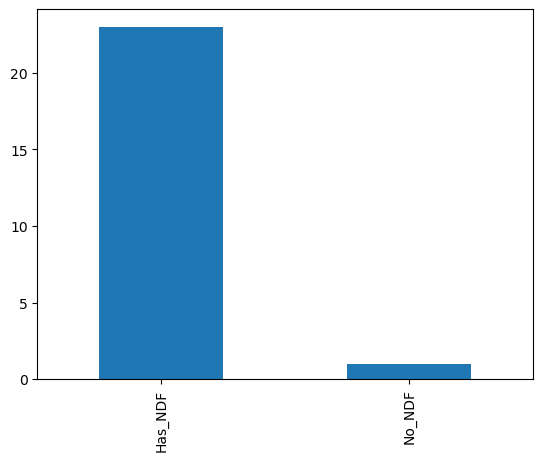

In [95]:
# NimbleGen .NDF availability by GPL
temp = newData[(newData.GPL_manufacturer == "NimbleGen") & newData.is_processable][["GPL_supplementary_file", "GPL_geo_accession"]].drop_duplicates()
temp = temp.GPL_supplementary_file.apply(lambda x: False if type(x) == float else bool(re.search(r".ndf", x, flags=re.IGNORECASE))).value_counts()
temp.index = ["Has_NDF", "No_NDF"]
print(temp)
print(round(temp*100/sum(temp)))
temp.plot(kind="bar")

No_GAL     34
Has_GAL     1
Name: count, dtype: int64
No_GAL     97.0
Has_GAL     3.0
Name: count, dtype: float64


<Axes: >

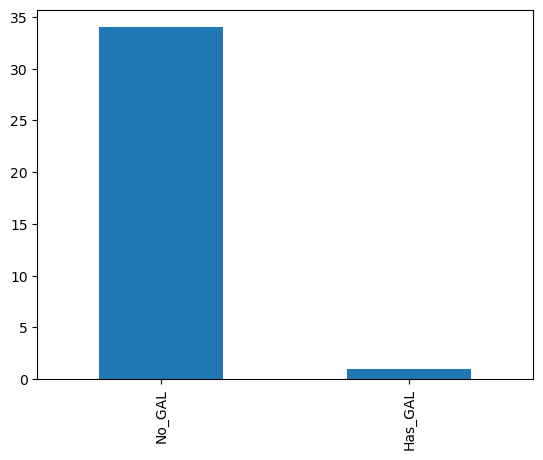

In [98]:
# Agilent .GAL availability by GPL
temp = newData[(newData.GPL_manufacturer == "Agilent") & newData.is_processable][["GPL_supplementary_file", "GPL_geo_accession"]].drop_duplicates()
temp = temp.GPL_supplementary_file.apply(lambda x: False if type(x) == float else bool(re.search(r".gal", x, flags=re.IGNORECASE))).value_counts()
temp.index = ["No_GAL", "Has_GAL"]
print(temp)
print(round(temp*100/sum(temp)))
temp.plot(kind="bar")

No_GAL     877
Has_GAL     16
Name: count, dtype: int64
No_GAL     98.0
Has_GAL     2.0
Name: count, dtype: float64


<Axes: >

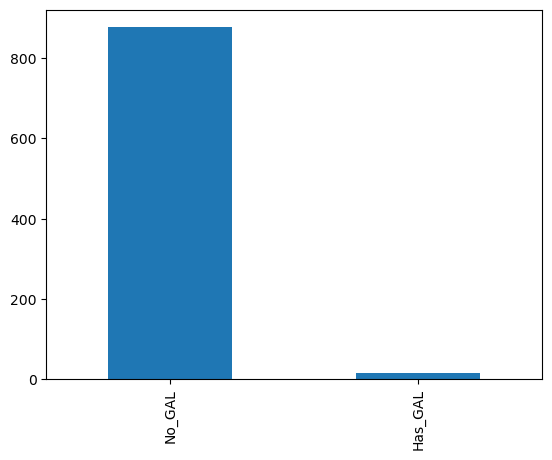

In [99]:
# Agilent .GAL availability by GSM
temp = newData[(newData.GPL_manufacturer == "Agilent") & newData.is_processable][["GPL_supplementary_file", "GSM_geo_accession"]].drop_duplicates()
temp = temp.GPL_supplementary_file.apply(lambda x: False if type(x) == float else bool(re.search(r".gal", x, flags=re.IGNORECASE))).value_counts()
temp.index = ["No_GAL", "Has_GAL"]
print(temp)
print(round(temp*100/sum(temp)))
temp.plot(kind="bar")

In [103]:
newData[newData.is_processable & (newData.GPL_manufacturer == "Agilent")].GPL_supplementary_file.unique()

array([nan,
       'geo/platforms/GPL17nnn/GPL17693/suppl/GPL17693_024017_D_GEO_20090520.txt.gz',
       'geo/platforms/GPL22nnn/GPL22357/suppl/GPL22357_045822_D_GEO_20121210.txt.gz',
       'geo/platforms/GPL14nnn/GPL14135/suppl/GPL14135_020097_D_20080619.gal.gz',
       'geo/platforms/GPL13nnn/GPL13237/suppl/GPL13237_full_table.txt.gz',
       'geo/platforms/GPL18nnn/GPL18055/suppl/GPL18055_probe_sequences.txt.gz',
       'geo/platforms/GPL15nnn/GPL15500/suppl/GPL15500_full_table.txt.gz',
       'geo/platforms/GPL8nnn/GPL8431/suppl/GPL8431_Full_Array_layout.txt.gz',
       'geo/platforms/GPL21nnn/GPL21747/suppl/GPL21747_064096_D_GEO_20140130.txt.gz;geo/platforms/GPL21nnn/GPL21747/suppl/GPL21747_MW2_CDS_Probe_MINIMAL.XLS.gz',
       'geo/platforms/GPL18nnn/GPL18103/suppl/GPL18103_031115_D_GEO_20101111.txt.gz'],
      dtype=object)

In [119]:
# Redundancy GPL supp and GPL table
tables = os.path.abspath("/export/storage/users/diegocar/abasySpecieFiles/GPL_Tables")
supps = os.path.abspath("/export/storage/users/diegocar/abasySpecieFiles/GPL_supplementary_files")
gpls = newData[newData.is_processable & newData.has_GPL_supp].GPL_geo_accession.unique()

In [126]:
GPLS = pd.DataFrame.from_dict([{"GPL": row.GPL_geo_accession, "Supp":os.path.join(supps, file), "Table":os.path.join(tables,row.GPL_geo_accession)} for i,row in newData[newData.is_processable & newData.has_GPL_supp].iterrows() for file in row.GPL_supplementary_file.split(';')])

In [127]:
GPLS

,GPL,Supp,Table
0,GPL17693,/export/storage/users/diegocar/abasySpecieFile...,/export/storage/users/diegocar/abasySpecieFile...
1,GPL17693,/export/storage/users/diegocar/abasySpecieFile...,/export/storage/users/diegocar/abasySpecieFile...
2,GPL17693,/export/storage/users/diegocar/abasySpecieFile...,/export/storage/users/diegocar/abasySpecieFile...
3,GPL17693,/export/storage/users/diegocar/abasySpecieFile...,/export/storage/users/diegocar/abasySpecieFile...
4,GPL17693,/export/storage/users/diegocar/abasySpecieFile...,/export/storage/users/diegocar/abasySpecieFile...
...,...,...,...
5012,GPL6186,/export/storage/users/diegocar/abasySpecieFile...,/export/storage/users/diegocar/abasySpecieFile...
5013,GPL6186,/export/storage/users/diegocar/abasySpecieFile...,/export/storage/users/diegocar/abasySpecieFile...
5014,GPL6186,/export/storage/users/diegocar/abasySpecieFile...,/export/storage/users/diegocar/abasySpecieFile...
5015,GPL6186,/export/storage/users/diegocar/abasySpecieFile...,/export/storage/users/diegocar/abasySpecieFile...


## NimbleGen

In [155]:
ndfs = newData[newData.is_processable & (newData.GPL_manufacturer_x == "NimbleGen")  & (newData.GPL_supplementary_file.str.contains(".ndf", case=False))].GSM_geo_accession

In [157]:
newData[newData.is_processable & (newData.GPL_manufacturer_x == "NimbleGen")  & (~newData.GSM_geo_accession.isin(ndfs))]

,TaxId_x,GPL_geo_accession_x,GPL_distribution_x,GPL_manufacturer_x,GSM_geo_accession,Specie,is_processable,Local_path,File_name,is_downloaded,...,GSM_type,GSM_channel_count,GSM_source_name_ch1,GSM_taxid_ch1,GSM_organism_ch1,GSM_characteristics_ch1,GSM_taxid_ch2,GSM_characteristics_ch2,GSM_supplementary_file,has_GPL_supp
7082,1313,GPL24257,custom-commercial,NimbleGen,GSM4096317,Streptococcus pneumoniae,True,/export/storage/users/diegocar/abasySpecieFile...,GSM4096317_555514A07_50040_532_sample1_Glu_wt1...,True,...,RNA,1,Clinical strain PN4594-T23,1313,Streptococcus pneumoniae,media: CDM-Glucose;media: Liquid culture;genot...,NaN,NaN,geo/samples/GSM4096nnn/GSM4096317/suppl/GSM409...,True
7084,1313,GPL24257,custom-commercial,NimbleGen,GSM4096318,Streptococcus pneumoniae,True,/export/storage/users/diegocar/abasySpecieFile...,GSM4096318_555514A09_50040_532_sample2_Glu_wt2...,True,...,RNA,1,Clinical strain PN4594-T23,1313,Streptococcus pneumoniae,media: CDM-Glucose;media: Liquid culture;genot...,NaN,NaN,geo/samples/GSM4096nnn/GSM4096318/suppl/GSM409...,True
7086,1313,GPL24257,custom-commercial,NimbleGen,GSM4096319,Streptococcus pneumoniae,True,/export/storage/users/diegocar/abasySpecieFile...,GSM4096319_555514A11_50040_532_sample3_Glu_wt3...,True,...,RNA,1,Clinical strain PN4594-T23,1313,Streptococcus pneumoniae,media: CDM-Glucose;media: Liquid culture;genot...,NaN,NaN,geo/samples/GSM4096nnn/GSM4096319/suppl/GSM409...,True
7088,1313,GPL24257,custom-commercial,NimbleGen,GSM4096320,Streptococcus pneumoniae,True,/export/storage/users/diegocar/abasySpecieFile...,GSM4096320_555514A08_50040_532_sample4_Glu_ko1...,True,...,RNA,1,Clinical strain PN4594-T23,1313,Streptococcus pneumoniae,media: CDM-Glucose;media: Liquid culture;genot...,NaN,NaN,geo/samples/GSM4096nnn/GSM4096320/suppl/GSM409...,True
7090,1313,GPL24257,custom-commercial,NimbleGen,GSM4096321,Streptococcus pneumoniae,True,/export/storage/users/diegocar/abasySpecieFile...,GSM4096321_555514A10_50040_532_sample5_Glu_ko2...,True,...,RNA,1,Clinical strain PN4594-T23,1313,Streptococcus pneumoniae,media: CDM-Glucose;media: Liquid culture;genot...,NaN,NaN,geo/samples/GSM4096nnn/GSM4096321/suppl/GSM409...,True
7092,1313,GPL24257,custom-commercial,NimbleGen,GSM4096322,Streptococcus pneumoniae,True,/export/storage/users/diegocar/abasySpecieFile...,GSM4096322_555514A12_50040_532_sample6_Glu_ko3...,True,...,RNA,1,Clinical strain PN4594-T23,1313,Streptococcus pneumoniae,media: CDM-Glucose;media: Liquid culture;genot...,NaN,NaN,geo/samples/GSM4096nnn/GSM4096322/suppl/GSM409...,True
7103,1313,GPL24257,custom-commercial,NimbleGen,GSM2849881,Streptococcus pneumoniae,True,/export/storage/users/diegocar/abasySpecieFile...,GSM2849881_WT1.pair,True,...,RNA,1,Streptococcus pneumoniae PN4595-T23 wild-type,1313,Streptococcus pneumoniae,genotype: Wild-type,NaN,NaN,geo/samples/GSM2849nnn/GSM2849881/suppl/GSM284...,True
7105,1313,GPL24257,custom-commercial,NimbleGen,GSM2849882,Streptococcus pneumoniae,True,/export/storage/users/diegocar/abasySpecieFile...,GSM2849882_WT2.pair,True,...,RNA,1,Streptococcus pneumoniae PN4595-T23 wild-type,1313,Streptococcus pneumoniae,genotype: Wild-type,NaN,NaN,geo/samples/GSM2849nnn/GSM2849882/suppl/GSM284...,True
7107,1313,GPL24257,custom-commercial,NimbleGen,GSM2849883,Streptococcus pneumoniae,True,/export/storage/users/diegocar/abasySpecieFile...,GSM2849883_WT3.pair,True,...,RNA,1,Streptococcus pneumoniae PN4595-T23 wild-type,1313,Streptococcus pneumoniae,genotype: Wild-type,NaN,NaN,geo/samples/GSM2849nnn/GSM2849883/suppl/GSM284...,True
7109,1313,GPL24257,custom-commercial,NimbleGen,GSM2849884,Streptococcus pneumoniae,True,/export/storage/users/diegocar/abasySpecieFile...,GSM2849884_KO1.pair,True,...,RNA,1,Streptococcus pneumoniae PN4595-T23 delta-TprA2,1313,Streptococcus pneumoniae,genotype: Deletion of tprA2 (SPN23F_12750),NaN,NaN,geo/samples/GSM2849nnn/GSM2849884/suppl/GSM284...,True


In [82]:
from utils_normalization import NimbleGen

In [83]:
ndf = pd.read_csv("../../GPL25406_130108_Ecoli_K12_exp.ndf", sep='\t')
gsm = NimbleGen("../../abasySpecieFiles/Escherichia_coli/TaxId_511145/GPL25406/GSM3317857_Ecoli_rne_deltaMTS_T0_kinetic1.pair")

In [125]:
supp = pd.read_csv("../../abasySpecieFiles/Escherichia_coli/TaxId_511145/GPL25406/GSM3317857_Ecoli_rne_deltaMTS_T0_kinetic1.pair", sep='\t', skiprows=1)
supp2 = pd.read_csv("../../abasySpecieFiles/Escherichia_coli/TaxId_511145/GPL25406/GSM3317858_Ecoli_rne_deltaMTS_T1_kinetic1.pair", sep='\t', skiprows=1)
supp3 = pd.read_csv("../../abasySpecieFiles/Escherichia_coli/TaxId_511145/GPL25406/GSM3317859_Ecoli_rne_deltaMTS_T4_kinetic1.pair", sep='\t', skiprows=1)

In [127]:
pd.concat([supp[["SEQ_ID", "PM"]], supp2[["SEQ_ID", "PM"]], supp3[["SEQ_ID", "PM"]]], axis=1, join="inner")

,SEQ_ID,PM,SEQ_ID,PM,SEQ_ID,PM
0,RANDOM_MK1,71.92,RANDOM_MK1,69.51,RANDOM_MK1,75.04
1,RANDOM_MK1,176.88,RANDOM_MK1,105.78,RANDOM_MK1,144.04
2,RANDOM_MK1,76.12,RANDOM_MK1,77.94,RANDOM_MK1,79.53
3,RANDOM_MK1,94.88,RANDOM_MK1,103.78,RANDOM_MK1,86.84
4,RANDOM_MK1,146.49,RANDOM_MK1,96.06,RANDOM_MK1,100.55
...,...,...,...,...,...,...
140658,b4661071000002309,139.71,b4661071000002309,113.16,b4661071000002309,93.84
140659,b4661071000002309,159.86,b4661071000002309,116.84,b4661071000002309,81.35
140660,b4661071000002309,158.33,b4661071000002309,154.43,b4661071000002309,83.22
140661,b4661071000002309,134.65,b4661071000002309,102.88,b4661071000002309,89.06


In [120]:
supp[supp.SEQ_ID == "b0624071000000617"]

(32, 11)

In [121]:
ndf.shape[0] * 32

4677440

In [95]:
len(set(supp.SEQ_ID) & set(ndf.SEQ_ID)) / len(set(supp.SEQ_ID) | set(ndf.SEQ_ID))

0.995088868101029

In [99]:
len(set(supp.SEQ_ID) & set(ndf.SEQ_ID)) / len(set(supp.SEQ_ID))

1.0

In [96]:
set(supp.SEQ_ID).symmetric_difference( set(ndf.SEQ_ID))

{'CHIP_ID1',
 'CHIP_ID2',
 'CNC001AMP',
 'CNC001DEL',
 'CROSSHYBE',
 'DESIGN_ID1',
 'DESIGN_ID2',
 'EMPTY',
 'FIDUCIAL_LOWER_LEFT',
 'FIDUCIAL_LOWER_RIGHT',
 'FIDUCIAL_UPPER_LEFT',
 'FIDUCIAL_UPPER_RIGHT',
 'LINKER1',
 'LINKER2',
 'MAGIC_ALIGNMENT1',
 'MAGIC_ALIGNMENT2',
 'MAGIC_ALIGNMENT3',
 'MAGIC_ALIGNMENT4',
 'SAMPLE_TRACKING',
 'SYNTHESIS',
 'UNIFORMITY'}

In [97]:
set(supp.SEQ_ID) - set(ndf.SEQ_ID)

set()

In [103]:
ndf[ndf.SEQ_ID.isin(set(ndf.SEQ_ID) - set(supp.SEQ_ID)) ]

,PROBE_DESIGN_ID,CONTAINER,DESIGN_NOTE,SELECTION_CRITERIA,SEQ_ID,PROBE_SEQUENCE,MISMATCH,MATCH_INDEX,FEATURE_ID,ROW_NUM,COL_NUM,PROBE_CLASS,PROBE_ID,POSITION,DESIGN_ID,X,Y
0,579571_0001_0001,NGS_CONTROLS,crosshhybe,bright,CROSSHYBE,TAGCGTTGCTTAGGCGTACGCAGTCTGATGCGTCGTTAGCATCGGC...,0,14538087,14538087,1,1,control:crosshybe,XENOTRACK48P01,1,579571,1,1
1,579571_0002_0001,NGS_CONTROLS,EMPTY,dark,EMPTY,N,0,14538088,14538088,1,2,control:empty,EMPTY,0,579571,2,1
2,579571_0003_0001,NGS_CONTROLS,crosshhybe,bright,CROSSHYBE,CGATGCGACGCGAACTAAGCAGTTCGGCGCAGTCGACTAGTATAAC...,0,14538089,14538089,1,3,control:crosshybe,XENOTRACK48P02,2,579571,3,1
3,579571_0004_0001,NGS_CONTROLS,EMPTY,dark,EMPTY,N,0,14538090,14538090,1,4,control:empty,EMPTY,0,579571,4,1
4,579571_0005_0001,NGS_CONTROLS,crosshhybe,bright,CROSSHYBE,GTCGCAACGAGTTAGCGTGATCGACTTGACTGCGTACGCACAGCAA...,0,14538091,14538091,1,5,control:crosshybe,XENOTRACK48P03,3,579571,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146165,579571_0456_0635,NGS_CONTROLS,EMPTY,dark,EMPTY,N,0,14539184,14539184,635,456,control:empty,EMPTY,0,579571,456,635
146166,579571_0457_0635,NGS_CONTROLS,crosshhybe,bright,CROSSHYBE,CCGTTGAGTAACGTCGAGCGTTAGGTCTCAGCGTAAGCGTCGATAA...,0,14539183,14539183,635,457,control:crosshybe,XENOTRACK48P09,9,579571,457,635
146167,579571_0458_0635,NGS_CONTROLS,EMPTY,dark,EMPTY,N,0,14539182,14539182,635,458,control:empty,EMPTY,0,579571,458,635
146168,579571_0459_0635,NGS_CONTROLS,crosshhybe,bright,CROSSHYBE,CCGCGTGCAATTATCGGAGTCTAGCGGAAGTACACAACTCGGTCGT...,0,14539181,14539181,635,459,control:crosshybe,XENOTRACK48P08,8,579571,459,635


In [104]:
ndf.shape[0] - supp.shape[0]

5507

# GPL supplementary files availability

In [46]:
path = "/export/space2/users/diegocar/Test/Query/2312/07_getGeoTest/getGeoTest.tsv"
data = pd.read_csv(path, sep='\t')
download = pd.read_csv("../../abasySpecieFiles/downloadPaths.tsv", sep='\t')
newData = pd.merge(download[["GSM_geo_accession", "Local_path", "File_name", "is_processable"]],
                    data[["GSM_geo_accession", "GPL_manufacturer", "GPL_supplementary_file", "GPL_geo_accession"]],
                      on="GSM_geo_accession").drop_duplicates()

In [47]:
gplTables = "/export/storage/users/diegocar/abasySpecieFiles/GPL_Tables"
temp = {gpl.rstrip('.txt') : os.path.join(gplTables, gpl) for gpl in os.listdir(gplTables)}
temp = pd.DataFrame.from_dict({"GPL_geo_accession":temp.keys(), "GPL_table":temp.values()})
data = newData.merge(temp, how="left")
data["GPL_table"] = data.GPL_table.fillna(False)
data["GPL_supplementary_file"] = data.GPL_supplementary_file.fillna(False)

In [80]:
def classify(row):
    t = bool(row.GPL_table)
    s = bool(row.GPL_supplementary_file)
    if t and s: return "Both"
    if t and not s: return "OnlyTable"
    if not t and s: return "OnlySupp"
    if not t and not s: return "None"
data["Class"] = data.apply(classify, axis=1)

In [98]:
data[["GPL_geo_accession", "Class"]].drop_duplicates().Class.value_counts()

Class
OnlyTable    120
Both          68
OnlySupp       1
Name: count, dtype: int64

In [102]:
data[data.Class == "OnlySupp"]

,GSM_geo_accession,Local_path,File_name,is_processable,GPL_manufacturer,GPL_supplementary_file,GPL_geo_accession,GPL_table,Class,hasType,ClassR
5991,GSM1448888,/export/storage/users/diegocar/abasySpecieFile...,GSM1448888_HZI2999_PATA1w520385F.CEL,True,Affymetrix,geo/platforms/GPL19nnn/GPL19010/suppl/GPL19010...,GPL19010,False,OnlySupp,False,None
5992,GSM1448888,/export/storage/users/diegocar/abasySpecieFile...,GSM1448888_PA4203-1_vs_H2O2_pvalue.bar,False,Affymetrix,geo/platforms/GPL19nnn/GPL19010/suppl/GPL19010...,GPL19010,False,OnlySupp,False,None
5993,GSM1448888,/export/storage/users/diegocar/abasySpecieFile...,GSM1448888_PA4203-1_vs_H2O2_signal.bar,False,Affymetrix,geo/platforms/GPL19nnn/GPL19010/suppl/GPL19010...,GPL19010,False,OnlySupp,False,None
5994,GSM1448889,/export/storage/users/diegocar/abasySpecieFile...,GSM1448889_HZI3000_PATA1w520385F.CEL,True,Affymetrix,geo/platforms/GPL19nnn/GPL19010/suppl/GPL19010...,GPL19010,False,OnlySupp,False,None
5995,GSM1448889,/export/storage/users/diegocar/abasySpecieFile...,GSM1448889_PA4203-2_vs_H2O2_pvalue.bar,False,Affymetrix,geo/platforms/GPL19nnn/GPL19010/suppl/GPL19010...,GPL19010,False,OnlySupp,False,None
5996,GSM1448889,/export/storage/users/diegocar/abasySpecieFile...,GSM1448889_PA4203-2_vs_H2O2_signal.bar,False,Affymetrix,geo/platforms/GPL19nnn/GPL19010/suppl/GPL19010...,GPL19010,False,OnlySupp,False,None
5997,GSM1448890,/export/storage/users/diegocar/abasySpecieFile...,GSM1448890_HZI3002_PATA1w520385F.CEL,True,Affymetrix,geo/platforms/GPL19nnn/GPL19010/suppl/GPL19010...,GPL19010,False,OnlySupp,False,None


In [101]:
data[["GSM_geo_accession", "Class"]].drop_duplicates().Class.value_counts()

Class
OnlyTable    4665
Both         2444
OnlySupp        3
Name: count, dtype: int64

In [84]:
def hasType(row):
    files = {"Affymetrix":r"\.cdf", "Agilent":r"\.gal", "NimbleGen":r"\.ndf"}
    return (supp := row.GPL_supplementary_file) and bool(temp := (files.get(row.GPL_manufacturer))) and bool(re.search(temp, supp, flags=re.IGNORECASE))

In [85]:
data["hasType"] = data.apply(hasType, axis=1)

In [99]:
def classifyR(row):
    t = bool(row.GPL_table)
    s = bool(row.GPL_supplementary_file) and bool(row.hasType)
    if t and s: return "Both"
    if t and not s: return "OnlyTable"
    if not t and s: return "OnlySupp"
    if not t and not s: return "None"
data["ClassR"] = data.apply(classifyR, axis=1)
data[["GPL_geo_accession", "ClassR"]].drop_duplicates().ClassR.value_counts()

ClassR
OnlyTable    146
Both          42
None           1
Name: count, dtype: int64

In [100]:
data[["GSM_geo_accession", "ClassR"]].drop_duplicates().ClassR.value_counts()

ClassR
OnlyTable    5107
Both         2002
None            3
Name: count, dtype: int64

In [121]:
data[data.GPL_manufacturer.isin(["Affymetrix"]) & (data.Class == "OnlyTable")].GPL_geo_accession.unique()

array(['GPL343', 'GPL3154', 'GPL199', 'GPL84', 'GPL1339', 'GPL9953'],
      dtype=object)

In [ ]:
# Cambiar clasificación a good supp, bad supp and no supp

In [116]:
data[data.GPL_geo_accession == "GPL21669"].iloc[0].File_name

'GSM4505453_168_lysis.phase_1_FEoutput.txt'